In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### 문제정의
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어보자.

In [5]:
digit_data = pd.read_csv('data/digit_train.csv')
digit_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
digit_data.shape

(42000, 785)

In [7]:
img0 = digit_data.iloc[0, 1:]

In [8]:
print(img0.max())
print(img0.min())

255
0


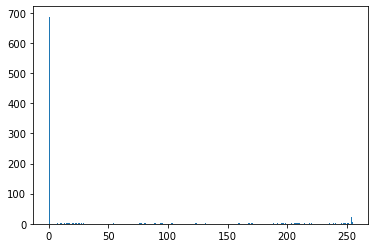

In [9]:
plt.hist(img0, bins = 255)
plt.show()

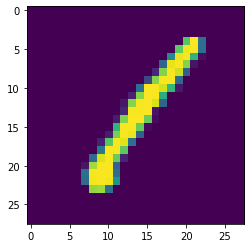

In [10]:
plt.imshow(img0.values.reshape(28, 28))

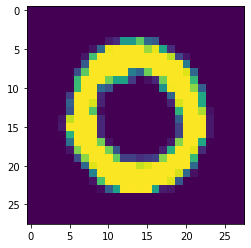

In [11]:
img1 = digit_data.iloc[1, 1:]
plt.imshow(img1.values.reshape(28, 28))

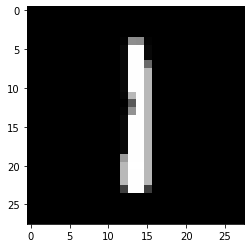

In [12]:
img2 = digit_data.iloc[2, 1:]
plt.imshow(img2.values.reshape(28, 28), cmap = 'gray')  # gray : 사진의 색을 흑백으로 바꿔줌

In [13]:
X = digit_data.iloc[:5000, 1:]
y = digit_data.iloc[:5000, 0]

In [14]:
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### 모델선정
- KNN
- Decision tree
- Logistic regression
- Linear SVM

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeClassifier(max_depth = 12)
logi = LogisticRegression(C=0.5)
svm = LinearSVC(C=0.5)

In [18]:
k_result = cross_val_score(knn, X_train, y_train, cv = 5)
t_result = cross_val_score(tree, X_train, y_train, cv = 5)
lo_result = cross_val_score(logi, X_train, y_train, cv = 5)
svm_result = cross_val_score(svm, X_train, y_train, cv = 5)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [19]:
print('knn : ', k_result.mean())
print('tree : ', t_result.mean())
print('logistic : ', lo_result.mean())
print('svm : ', svm_result.mean())

knn :  0.9154285714285715
tree :  0.7468571428571429
logistic :  0.872857142857143
svm :  0.8262857142857143


### test 확인

In [20]:
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
logi.fit(X_train, y_train)
svm.fit(X_train, y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.5)

In [21]:
print('knn : ', knn.score(X_test, y_test))
print('tree : ', tree.score(X_test, y_test))
print('logistic : ', logi.score(X_test, y_test))
print('svm : ', svm.score(X_test, y_test))

knn :  0.922
tree :  0.776
logistic :  0.8726666666666667
svm :  0.8386666666666667


###  스케일링

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mi_ma_s = MinMaxScaler()

In [24]:
mi_ma_s.fit(X_train)

MinMaxScaler()

In [25]:
X_train.s = mi_ma_s.transform(X_train)
X_test.s = mi_ma_s.transform(X_test)

<ipython-input-25-97b535241eb3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.s = mi_ma_s.transform(X_train)
<ipython-input-25-97b535241eb3>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.s = mi_ma_s.transform(X_test)


In [26]:
k_result = cross_val_score(knn, X_train.s, y_train, cv = 5)
t_result = cross_val_score(tree, X_train.s, y_train, cv = 5)
lo_result = cross_val_score(logi, X_train.s, y_train, cv = 5)
svm_result = cross_val_score(svm, X_train.s, y_train, cv = 5)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [27]:
print('knn : ', k_result.mean())
print('tree : ', t_result.mean())
print('logistic : ', lo_result.mean())
print('svm : ', svm_result.mean())

knn :  0.9154285714285713
tree :  0.7422857142857143
logistic :  0.8908571428571429
svm :  0.8694285714285716


In [28]:
knn.fit(X_train.s, y_train)
tree.fit(X_train.s, y_train)
logi.fit(X_train.s, y_train)
svm.fit(X_train.s, y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.5)

In [29]:
print('knn :', knn.score(X_test, y_test))
print('tree :', tree.score(X_test, y_test))
print('logi :', logi.score(X_test, y_test))
print('svm :', svm.score(X_test, y_test))

knn : 0.762
tree : 0.7226666666666667
logi : 0.8273333333333334
svm : 0.77


### 분류평가지표

In [30]:
from sklearn.metrics import classification_report

In [31]:
pre = knn.predict(X_test.s)
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.99      0.89      0.94       201
           2       0.89      0.97      0.93       159
           3       0.91      0.91      0.91       138
           4       0.87      0.93      0.90       149
           5       0.93      0.92      0.93       132
           6       0.96      0.95      0.95       162
           7       0.92      0.93      0.92       150
           8       0.82      0.93      0.87       100
           9       0.92      0.83      0.87       160

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500

